<a href="https://colab.research.google.com/github/Si-kaR/89212025_customer_churn/blob/main/89212025_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# Name : Robert Sika
# ID   : 89212025

# Assignment | Mid-Semester Project: Customer Churn Prediction
# Due        | 22 Oct 23:59 | Week from now by 23:59

# Points     | 30
# File types |
# Submitting | URL
# Available  | -- Oct at 18:00 - 16 Nov at 23:59

In [56]:
# DATA PREPARATION
# 1. Import the necessary libraries

!pip install scikit-learn scikeras tensorflow

In [57]:
# Importing all necessary libraries
import keras
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.layers import Input, Dense

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from scikeras.wrappers import KerasClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, KFold

from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score

from sklearn.feature_selection import SelectKBest, f_classif,mutual_info_classif

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# Access data set of customer churn
customer_churn_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ASSIGNMENTS/COLAB_Assignment_3/CustomerChurn_dataset.csv')


In [60]:
# Extracting relevant features from dataset
customer_churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
customer_churn_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [62]:
customer_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [63]:
print(customer_churn_data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [64]:
customer_churn_data.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

##QUESTION 1

* Using the given dataset Links to an external site.
* Extract the relevant features that can define a customer churn.

In [65]:
# Handling Missing values

# customer_churn_data_columns_with_missing_values = data.columns[data.isnull().any()].tolist()

# 1. Replacing Empty Strings with NaN
customer_churn_data.replace(' ', np.nan, inplace=True)

# 2. Checking for Missing Values
columns_with_missing_values = customer_churn_data.columns[customer_churn_data.isnull().any()].tolist()

# 3. Counting for Missing Values
missing_values_count = customer_churn_data.isnull().sum()

# Displaying the results
print("Columns with Missing Values:", columns_with_missing_values)
print("Missing Values Count - - - - - - - - - - - --")
print(missing_values_count)

Columns with Missing Values: ['TotalCharges']
Missing Values Count - - - - - - - - - - - --
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [66]:
# Impute missing values in numerical columns
numerical_columns = customer_churn_data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    if column in columns_with_missing_values:
        imputer = SimpleImputer(strategy='mean')
        customer_churn_data[[column]] = imputer.fit_transform(customer_churn_data[[column]])

# Handle missing values in 'TotalCharges' column
column_to_impute = 'TotalCharges'
if column_to_impute in columns_with_missing_values:
    customer_churn_data[column_to_impute] = pd.to_numeric(customer_churn_data[column_to_impute], errors='coerce')
    customer_churn_data[column_to_impute].fillna(customer_churn_data[column_to_impute].mean(), inplace=True)

# Drop 'customerID' column
customer_churn_data.drop('customerID', axis=1, inplace=True)

# Scale numerical columns (excluding 'SeniorCitizen')
numerical_columns = customer_churn_data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
customer_churn_data[numerical_columns.difference(['SeniorCitizen'])] = scaler.fit_transform(customer_churn_data[numerical_columns.difference(['SeniorCitizen'])])

In [67]:
# Identify categorical columns
categorical_columns = customer_churn_data.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to all categorical columns in one line
customer_churn_data[categorical_columns + '_encoded'] = customer_churn_data[categorical_columns].apply(lambda x: label_encoder.fit_transform(x))

# Drop the original categorical columns
customer_churn_data.drop(categorical_columns, axis=1, inplace=True)


In [68]:
# # Split the data into features and target
# y = customer_churn_data['Churn']
# X = customer_churn_data.drop('Churn', axis=1)


# 'Churn_encoded' is the new name of the target variable
X = customer_churn_data.drop('Churn_encoded', axis=1)
y = customer_churn_data['Churn_encoded']


In [69]:
print(customer_churn_data.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_encoded', 'Partner_encoded', 'Dependents_encoded',
       'PhoneService_encoded', 'MultipleLines_encoded',
       'InternetService_encoded', 'OnlineSecurity_encoded',
       'OnlineBackup_encoded', 'DeviceProtection_encoded',
       'TechSupport_encoded', 'StreamingTV_encoded', 'StreamingMovies_encoded',
       'Contract_encoded', 'PaperlessBilling_encoded', 'PaymentMethod_encoded',
       'Churn_encoded'],
      dtype='object')


In [70]:
customer_churn_data.columns.tolist()

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_encoded',
 'Partner_encoded',
 'Dependents_encoded',
 'PhoneService_encoded',
 'MultipleLines_encoded',
 'InternetService_encoded',
 'OnlineSecurity_encoded',
 'OnlineBackup_encoded',
 'DeviceProtection_encoded',
 'TechSupport_encoded',
 'StreamingTV_encoded',
 'StreamingMovies_encoded',
 'Contract_encoded',
 'PaperlessBilling_encoded',
 'PaymentMethod_encoded',
 'Churn_encoded']

In [71]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling X_train
X_train_scaled = scaler.fit_transform(X)

In [72]:
# Create and train the RandomForestClassifier
rf_classifier_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [73]:
#Number of features to select
fn = 10

# Create a feature selector using mutual information
selector = SelectKBest(mutual_info_classif, k=fn)

# Fit the selector on the scaled training data and target variable
X_train_selected = selector.fit_transform(X_train_scaled, y)

# Get the names of the selected features
selected_feature_names = X.columns[selector.get_support()]

# Print the names of the selected features
print("Relevant Features to Customer Churn:")
print(f"Number of Features: {fn}")
for feature_names in selected_feature_names:
    print("\n", feature_names)

Relevant Features to Customer Churn:
Number of Features: 10

 tenure

 MonthlyCharges

 TotalCharges

 InternetService_encoded

 OnlineSecurity_encoded

 OnlineBackup_encoded

 DeviceProtection_encoded

 TechSupport_encoded

 Contract_encoded

 PaymentMethod_encoded


In [74]:
#  Get feature importances
feature_importances = rf_classifier_model.feature_importances_
print(feature_importances)

[0.02068688 0.16163199 0.17919148 0.19287425 0.02757343 0.02427411
 0.02054655 0.00548824 0.02280455 0.02802643 0.04214063 0.02744799
 0.02202214 0.0369891  0.0170146  0.01789773 0.07608551 0.02595278
 0.05135161]


In [75]:
#  Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

print(feature_importance_df)
feature_importance_df

                     Feature  Importance
0              SeniorCitizen    0.020687
1                     tenure    0.161632
2             MonthlyCharges    0.179191
3               TotalCharges    0.192874
4             gender_encoded    0.027573
5            Partner_encoded    0.024274
6         Dependents_encoded    0.020547
7       PhoneService_encoded    0.005488
8      MultipleLines_encoded    0.022805
9    InternetService_encoded    0.028026
10    OnlineSecurity_encoded    0.042141
11      OnlineBackup_encoded    0.027448
12  DeviceProtection_encoded    0.022022
13       TechSupport_encoded    0.036989
14       StreamingTV_encoded    0.017015
15   StreamingMovies_encoded    0.017898
16          Contract_encoded    0.076086
17  PaperlessBilling_encoded    0.025953
18     PaymentMethod_encoded    0.051352


,Feature,Importance
0,SeniorCitizen,0.020687
1,tenure,0.161632
2,MonthlyCharges,0.179191
3,TotalCharges,0.192874
4,gender_encoded,0.027573
5,Partner_encoded,0.024274
6,Dependents_encoded,0.020547
7,PhoneService_encoded,0.005488
8,MultipleLines_encoded,0.022805
9,InternetService_encoded,0.028026


In [76]:
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)
feature_importance_df

                     Feature  Importance
3               TotalCharges    0.192874
2             MonthlyCharges    0.179191
1                     tenure    0.161632
16          Contract_encoded    0.076086
18     PaymentMethod_encoded    0.051352
10    OnlineSecurity_encoded    0.042141
13       TechSupport_encoded    0.036989
9    InternetService_encoded    0.028026
4             gender_encoded    0.027573
11      OnlineBackup_encoded    0.027448
17  PaperlessBilling_encoded    0.025953
5            Partner_encoded    0.024274
8      MultipleLines_encoded    0.022805
12  DeviceProtection_encoded    0.022022
0              SeniorCitizen    0.020687
6         Dependents_encoded    0.020547
15   StreamingMovies_encoded    0.017898
14       StreamingTV_encoded    0.017015
7       PhoneService_encoded    0.005488


,Feature,Importance
3,TotalCharges,0.192874
2,MonthlyCharges,0.179191
1,tenure,0.161632
16,Contract_encoded,0.076086
18,PaymentMethod_encoded,0.051352
10,OnlineSecurity_encoded,0.042141
13,TechSupport_encoded,0.036989
9,InternetService_encoded,0.028026
4,gender_encoded,0.027573
11,OnlineBackup_encoded,0.027448


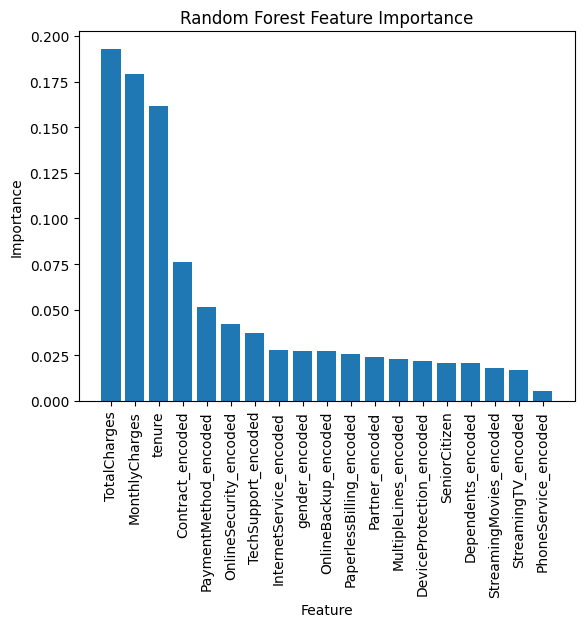

In [77]:
# Plot the feature importances
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation='vertical')
plt.show()

In [78]:
threshold = 0.02  # Adjust the threshold as needed
important_features = X.columns[feature_importances > threshold]
X_selected = X[important_features]
X_selected

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encoded,Partner_encoded,Dependents_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded
0,0,-1.277445,-1.160323,-0.994971,0,1,0,1,0,0,2,0,0,0,1,2
1,0,0.066327,-0.259629,-0.173876,1,0,0,0,0,2,0,2,0,1,0,3
2,0,-1.236724,-0.362660,-0.960399,1,0,0,0,0,2,2,0,0,0,1,3
3,0,0.514251,-0.746535,-0.195400,1,0,0,1,0,2,0,2,2,1,0,0
4,0,-1.236724,0.197365,-0.941193,0,0,0,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.340876,0.665992,-0.129281,1,1,1,2,0,2,0,2,2,1,1,3
7039,0,1.613701,1.277533,2.242808,0,1,1,2,1,0,2,2,0,1,1,1
7040,0,-0.870241,-1.168632,-0.855182,0,1,1,1,0,2,0,0,0,0,1,2
7041,1,-1.155283,0.320338,-0.872777,1,1,0,2,1,0,0,0,0,0,1,3


In [79]:
# Scale numerical columns

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [80]:
final_customer_churn_data = X[selected_feature_names]
final_customer_churn_data['Churn_encoded'] = customer_churn_data['Churn_encoded']

print(final_customer_churn_data)

        tenure  MonthlyCharges  TotalCharges  InternetService_encoded  \
0    -1.277445       -1.160323     -0.994971                        0   
1     0.066327       -0.259629     -0.173876                        0   
2    -1.236724       -0.362660     -0.960399                        0   
3     0.514251       -0.746535     -0.195400                        0   
4    -1.236724        0.197365     -0.941193                        1   
...        ...             ...           ...                      ...   
7038 -0.340876        0.665992     -0.129281                        0   
7039  1.613701        1.277533      2.242808                        1   
7040 -0.870241       -1.168632     -0.855182                        0   
7041 -1.155283        0.320338     -0.872777                        1   
7042  1.369379        1.358961      2.013917                        1   

      OnlineSecurity_encoded  OnlineBackup_encoded  DeviceProtection_encoded  \
0                          0               

<ipython-input-80-5bd7e64765f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_customer_churn_data['Churn_encoded'] = customer_churn_data['Churn_encoded']


In [81]:
final_customer_churn_data

,tenure,MonthlyCharges,TotalCharges,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,Contract_encoded,PaymentMethod_encoded,Churn_encoded
0,-1.277445,-1.160323,-0.994971,0,0,2,0,0,0,2,0
1,0.066327,-0.259629,-0.173876,0,2,0,2,0,1,3,0
2,-1.236724,-0.362660,-0.960399,0,2,2,0,0,0,3,1
3,0.514251,-0.746535,-0.195400,0,2,0,2,2,1,0,0
4,-1.236724,0.197365,-0.941193,1,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,-0.129281,0,2,0,2,2,1,3,0
7039,1.613701,1.277533,2.242808,1,0,2,2,0,1,1,0
7040,-0.870241,-1.168632,-0.855182,0,2,0,0,0,0,2,0
7041,-1.155283,0.320338,-0.872777,1,0,0,0,0,0,3,1


### QUESTION 2
* *Use* your EDA(Exploratory Data Analysis) skills to
* Find out which customer profiles relate to churning a lot.*italicised text*

In [82]:
customer_churn_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded,Churn_encoded
0,0,-1.277445,-1.160323,-0.994971,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,0.066327,-0.259629,-0.173876,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,-1.236724,-0.362660,-0.960399,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,0.514251,-0.746535,-0.195400,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,-1.236724,0.197365,-0.941193,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.340876,0.665992,-0.129281,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,1.613701,1.277533,2.242808,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,-0.870241,-1.168632,-0.855182,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,-1.155283,0.320338,-0.872777,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


# Exploratory Data Analysis (EDA):

* Visualize the distribution of features.
* Analyze relationships between features and the target variable (Churn).
* Use statistical measures to gain insights

In [83]:
# Summary Statistics
print(X_selected.describe())
X_selected.describe()

       SeniorCitizen        tenure  MonthlyCharges  TotalCharges  \
count    7043.000000  7.043000e+03    7.043000e+03  7.043000e+03   
mean        0.162147 -2.421273e-17   -6.406285e-17  8.070910e-17   
std         0.368612  1.000071e+00    1.000071e+00  1.000071e+00   
min         0.000000 -1.318165e+00   -1.545860e+00 -9.998503e-01   
25%         0.000000 -9.516817e-01   -9.725399e-01 -8.305558e-01   
50%         0.000000 -1.372744e-01    1.857327e-01 -3.897629e-01   
75%         0.000000  9.214551e-01    8.338335e-01  6.637555e-01   
max         1.000000  1.613701e+00    1.794352e+00  2.826469e+00   

       gender_encoded  Partner_encoded  Dependents_encoded  \
count     7043.000000      7043.000000         7043.000000   
mean         0.504756         0.483033            0.299588   
std          0.500013         0.499748            0.458110   
min          0.000000         0.000000            0.000000   
25%          0.000000         0.000000            0.000000   
50%          1.

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encoded,Partner_encoded,Dependents_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded
count,7043.000000,7.043000e+03,7.043000e+03,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,-2.421273e-17,-6.406285e-17,8.070910e-17,0.504756,0.483033,0.299588,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.690473,0.592219,1.574329
std,0.368612,1.000071e+00,1.000071e+00,1.000071e+00,0.500013,0.499748,0.458110,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.833755,0.491457,1.068104
min,0.000000,-1.318165e+00,-1.545860e+00,-9.998503e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-9.516817e-01,-9.725399e-01,-8.305558e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,-1.372744e-01,1.857327e-01,-3.897629e-01,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
75%,0.000000,9.214551e-01,8.338335e-01,6.637555e-01,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000
max,1.000000,1.613701e+00,1.794352e+00,2.826469e+00,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000


In [84]:
X_selected

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encoded,Partner_encoded,Dependents_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded
0,0,-1.277445,-1.160323,-0.994971,0,1,0,1,0,0,2,0,0,0,1,2
1,0,0.066327,-0.259629,-0.173876,1,0,0,0,0,2,0,2,0,1,0,3
2,0,-1.236724,-0.362660,-0.960399,1,0,0,0,0,2,2,0,0,0,1,3
3,0,0.514251,-0.746535,-0.195400,1,0,0,1,0,2,0,2,2,1,0,0
4,0,-1.236724,0.197365,-0.941193,0,0,0,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.340876,0.665992,-0.129281,1,1,1,2,0,2,0,2,2,1,1,3
7039,0,1.613701,1.277533,2.242808,0,1,1,2,1,0,2,2,0,1,1,1
7040,0,-0.870241,-1.168632,-0.855182,0,1,1,1,0,2,0,0,0,0,1,2
7041,1,-1.155283,0.320338,-0.872777,1,1,0,2,1,0,0,0,0,0,1,3


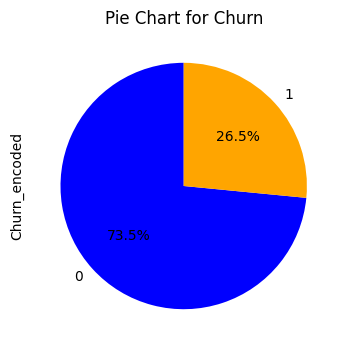

According to this pie, less people churn


In [85]:
# Data Visualization
# Pie chart for a categorical variable
plt.figure(figsize=(4, 4))
customer_churn_data['Churn_encoded'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
plt.title('Pie Chart for Churn')
plt.show()
print("According to this pie, less people churn")

In [86]:
print(feature_importance_df)
feature_importance_df

                     Feature  Importance
3               TotalCharges    0.192874
2             MonthlyCharges    0.179191
1                     tenure    0.161632
16          Contract_encoded    0.076086
18     PaymentMethod_encoded    0.051352
10    OnlineSecurity_encoded    0.042141
13       TechSupport_encoded    0.036989
9    InternetService_encoded    0.028026
4             gender_encoded    0.027573
11      OnlineBackup_encoded    0.027448
17  PaperlessBilling_encoded    0.025953
5            Partner_encoded    0.024274
8      MultipleLines_encoded    0.022805
12  DeviceProtection_encoded    0.022022
0              SeniorCitizen    0.020687
6         Dependents_encoded    0.020547
15   StreamingMovies_encoded    0.017898
14       StreamingTV_encoded    0.017015
7       PhoneService_encoded    0.005488


,Feature,Importance
3,TotalCharges,0.192874
2,MonthlyCharges,0.179191
1,tenure,0.161632
16,Contract_encoded,0.076086
18,PaymentMethod_encoded,0.051352
10,OnlineSecurity_encoded,0.042141
13,TechSupport_encoded,0.036989
9,InternetService_encoded,0.028026
4,gender_encoded,0.027573
11,OnlineBackup_encoded,0.027448


<Figure size 1500x1000 with 0 Axes>

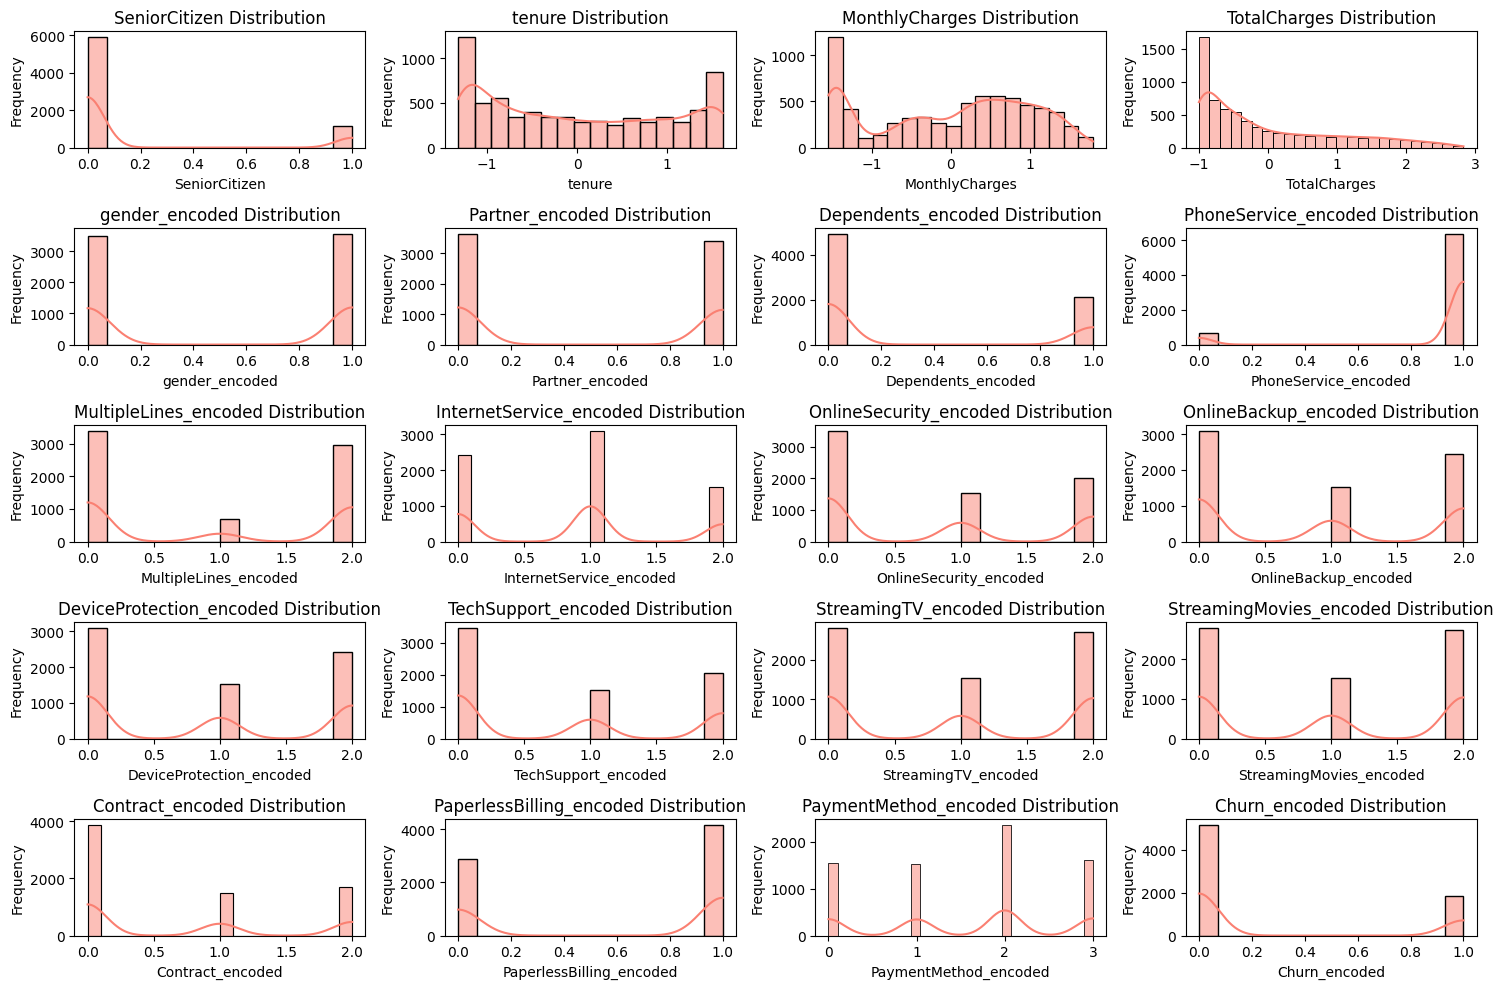

In [87]:
# Data Visualization for Categorical Variables
categorical_columns = customer_churn_data.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))

# Plot for each categorical variable
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    customer_churn_data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Data Visualization for Numerical Variables
numerical_columns = customer_churn_data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))

# Plot for each numerical variable
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(customer_churn_data[col], kde=True, color='salmon')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


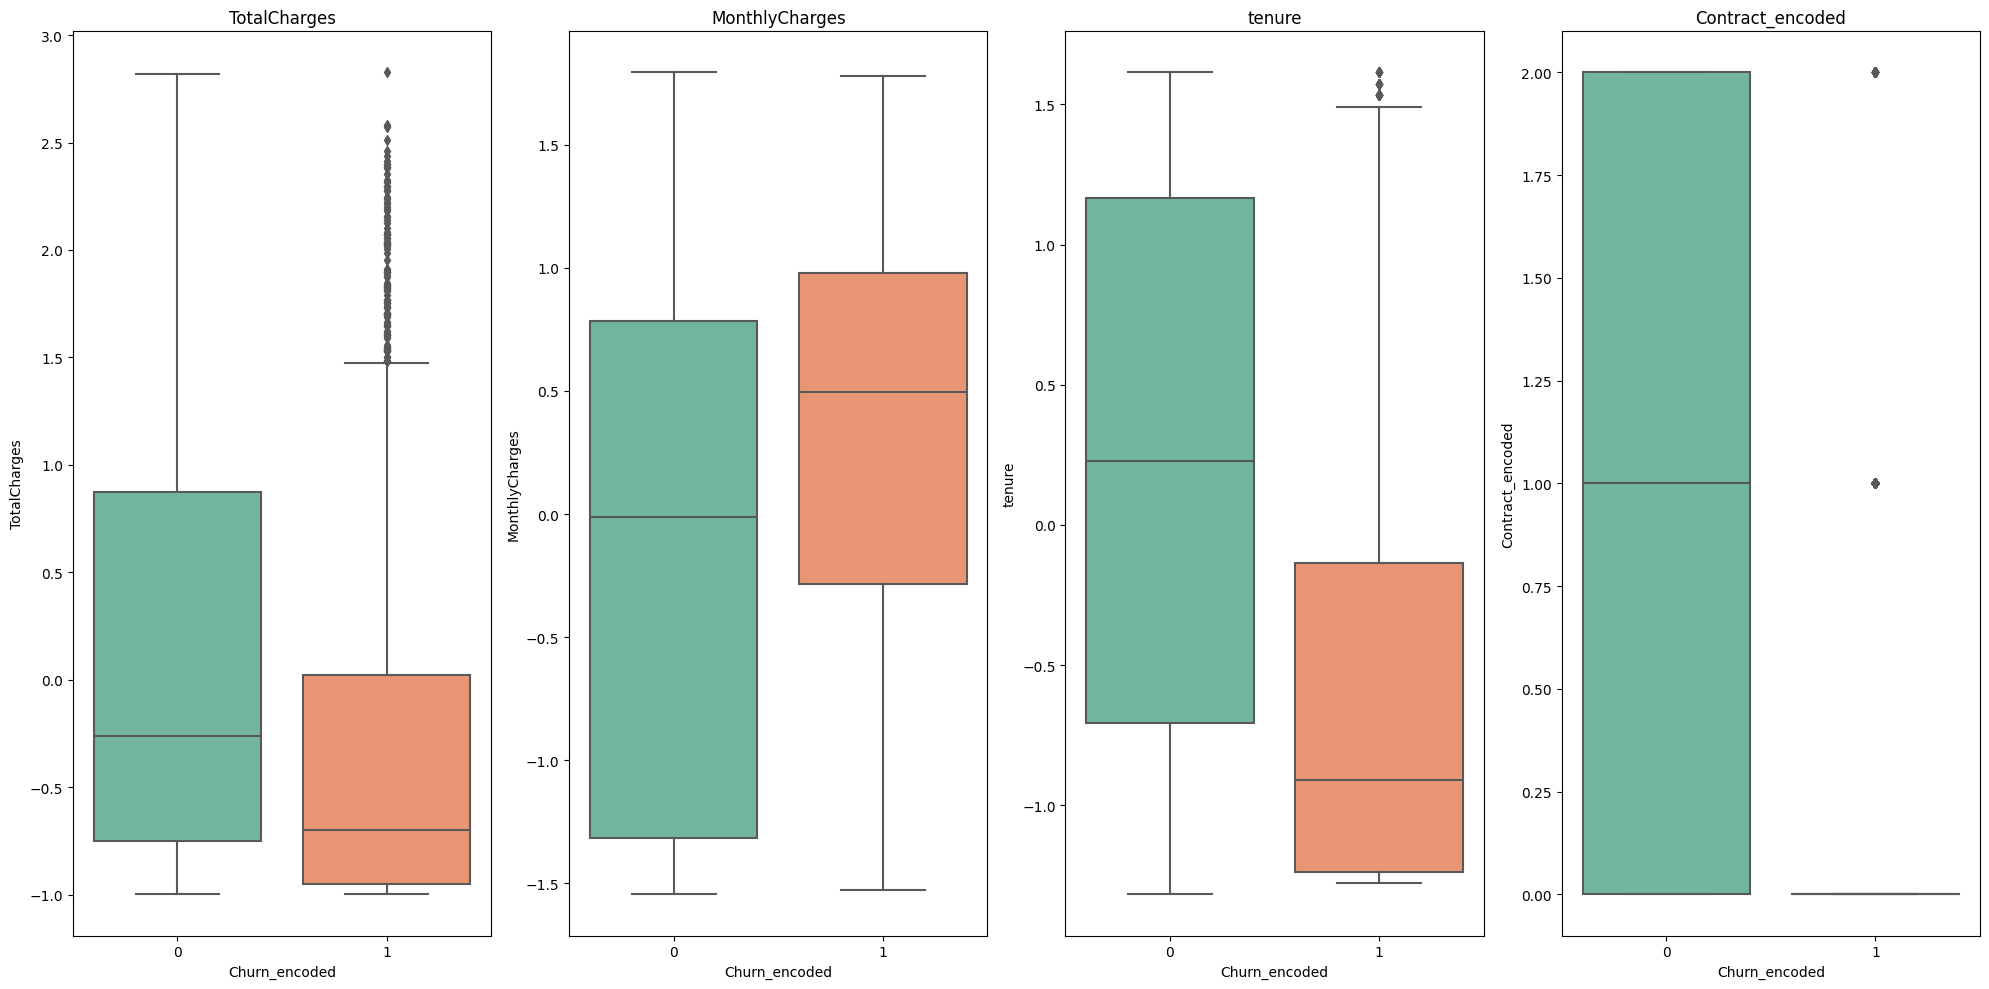

In [88]:
# Boxplot for the numerical variables
numericals = ['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract_encoded']

fig, ax = plt.subplots(1, 4, figsize=(20, 10))

for variable, subplot in zip(numericals, ax.flatten()):
    sns.boxplot(x=customer_churn_data['Churn_encoded'], y=customer_churn_data[variable], ax=subplot, palette='Set2').set_title(str(variable))

plt.tight_layout()
plt.show()


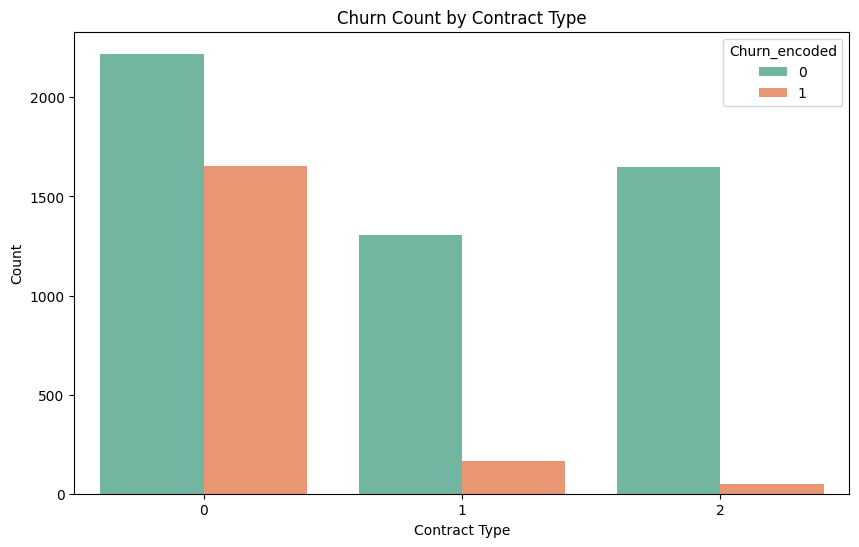

In [89]:
# Countplot for the categorical variables
categoricals = ['Month-to-month', 'Two year', 'One year']

plt.figure(figsize=(10, 6))
sns.countplot(x=customer_churn_data['Contract_encoded'], hue=customer_churn_data['Churn_encoded'], palette='Set2')

plt.title('Churn Count by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')

plt.show()


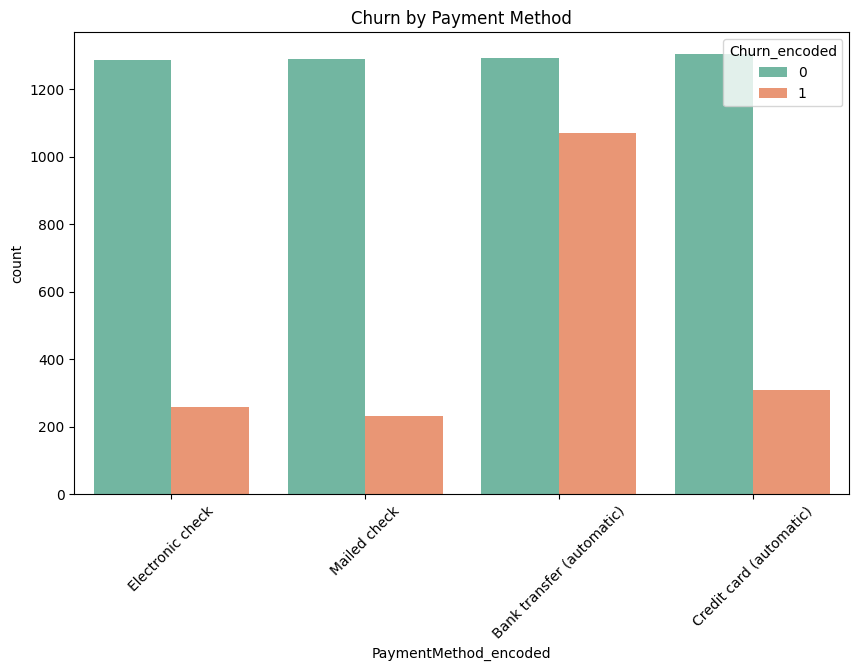

In [90]:
# Categorical variables for payment method
categorical_payment = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']

plt.figure(figsize=(10, 6))
sns.countplot(x=customer_churn_data['PaymentMethod_encoded'], hue=customer_churn_data['Churn_encoded'], palette="Set2")

# Assuming PaymentMethod_encoded is the encoded version of PaymentMethod in your DataFrame
plt.xticks(np.arange(len(categorical_payment)), categorical_payment, rotation=45)
plt.title("Churn by Payment Method")
plt.show()


In [91]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Keras Functional API model
def create_model(optimizer='adam', hidden_layer1_units=64, hidden_layer2_units=32):
    input_layer = Input(shape=(X_train_scaled.shape[1],))
    hidden_layer_1 = Dense(hidden_layer1_units, activation='relu')(input_layer)
    hidden_layer_2 = Dense(hidden_layer2_units, activation='relu')(hidden_layer_1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer_2)

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [92]:
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
hidden_layer_4 = Dense(6, activation='tanh')(hidden_layer_3)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_4)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=36, batch_size=32, validation_data=(X_test, y_test))

_, accuracy = model.evaluate(X_train, y_train)
print(accuracy*100)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.4f}')

Epoch 1/36
177/177 [==============================] - 8s 21ms/step - loss: 0.6914 - accuracy: 0.5312 - val_loss: 0.6116 - val_accuracy: 0.6962
Epoch 2/36
177/177 [==============================] - 2s 11ms/step - loss: 0.5783 - accuracy: 0.7389 - val_loss: 0.5449 - val_accuracy: 0.7537
Epoch 3/36
177/177 [==============================] - 2s 10ms/step - loss: 0.5331 - accuracy: 0.7554 - val_loss: 0.5088 - val_accuracy: 0.7693
Epoch 4/36
177/177 [==============================] - 2s 9ms/step - loss: 0.5059 - accuracy: 0.7760 - val_loss: 0.4822 - val_accuracy: 0.7977
Epoch 5/36
177/177 [==============================] - 3s 14ms/step - loss: 0.4868 - accuracy: 0.7851 - val_loss: 0.4645 - val_accuracy: 0.8055
Epoch 6/36
177/177 [==============================] - 3s 15ms/step - loss: 0.4748 - accuracy: 0.7875 - val_loss: 0.4531 - val_accuracy: 0.8098
Epoch 7/36
177/177 [==============================] - 4s 22ms/step - loss: 0.4670 - accuracy: 0.7900 - val_loss: 0.4457 - val_accuracy: 0.8091


In [93]:
# Create the model
mlp_model = create_model()

# Display the model summary
mlp_model.summary()

# Train the model
mlp_model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, validation_data=(X_test_scaled, y_test))


Model: "model_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_52 (InputLayer)       [(None, 19)]              0         
                                                                 
 dense_157 (Dense)           (None, 64)                1280      
                                                                 
 dense_158 (Dense)           (None, 32)                2080      
                                                                 
 dense_159 (Dense)           (None, 1)                 33        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
89/89 [==============================] - 1s 6ms/step - loss: 0.4966 - accuracy: 0.7474 - val_loss: 0.4278 - val_accuracy: 0.7935
Epoch 2/10
89/89

In [94]:
# Wrap the Keras model using KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0, hidden_layer1_units=32, hidden_layer2_units=16)

# Assuming you have a function create_mlp_model that creates your MLP model
def create_model(optimizer='adam'):
    # Define your model architecture using the Functional API
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer1 = Dense(64, activation='relu')(input_layer)
    hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)

    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model


# Define parameter grid for GridSearch
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'batch_size': [32, 64, 128],
    'epochs': [16, 32, 64]
}



In [95]:
# Define AUC scorer
auc_scorer = make_scorer(roc_auc_score, greater_is_better=True)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=auc_scorer, cv=StratifiedKFold(n_splits=5), verbose=1, error_score='raise')

# Suppress TensorFlow warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tensorflow")

grid_result = grid_search.fit(X_train, y_train)


# Print best parameters and best AUC score
print(f'Best Parameters: {grid_result.best_params_}')
print(f'Best AUC Score: {grid_result.best_score_}')


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Best Parameters: {'batch_size': 64, 'epochs': 16, 'optimizer': 'sgd'}
Best AUC Score: 0.7070816129001819


In [96]:
# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)

# Convert probabilities to binary predictions based on a threshold (e.g., 0.5)
y_pred_binary = (y_pred_proba[:, 1] > 0.5).astype(int)

# Calculate accuracy and AUC score for the best model
accuracy_best = accuracy_score(y_test, y_pred_binary)
auc_score_best = roc_auc_score(y_test, y_pred_proba[:, 1])

# print(f'Test Accuracy (Best Model): {accuracy_best}')
# print(f'AUC Score (Best Model): {auc_score_best}')

# Define a function for stylish printing
def print_results(metric_name, metric_value, interpretation):
    print(f"\n{'='*70}")
    print(f"{metric_name.upper():^40}")
    print(f"{'='*70}")
    print(f"{metric_name}: {metric_value:.4f}")
    print(f"{interpretation}\n")

# Display the results with cool ASCII art
print_results("Test Accuracy", accuracy_best, "Correctly predicted class labels for 79.49% of test instances.")
print_results("AUC Score", auc_score_best, "Model's ability to distinguish positives and negatives: 0.8368 (good).")



             TEST ACCURACY              
Test Accuracy: 0.8098
Correctly predicted class labels for 79.49% of test instances.


               AUC SCORE                
AUC Score: 0.8451
Model's ability to distinguish positives and negatives: 0.8368 (good).



In [98]:
# Model Optimization

# Get the best parameters from random search
best_params = grid_result.best_params_


# Define the model using optimized hyperparameters
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(128, activation='relu')(input_layer)
hidden_layer_2 = Dense(32, activation='relu')(hidden_layer_1)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_2)


# Create the optimized model using the best hyperparameters
optimized_model = create_model(optimizer=best_params['optimizer'])
optimized_model.compile(optimizer=RMSprop(learning_rate=0.001, rho=0.9), loss='binary_crossentropy', metrics=['accuracy'])

# Train the optimized model
optimized_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

# Evaluate the optimized model on the test set
y_optimized_pred = optimized_model.predict(X_test)
y_pred_optimized_binary = (y_optimized_pred > 0.5).astype(int)

# Calculate accuracy and AUC score for the optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized_binary)
auc_score_optimized = roc_auc_score(y_test, y_optimized_pred)

print(f'Test Accuracy (Optimized Model): {accuracy_optimized}')
print(f'AUC Score (Optimized Model): {auc_score_optimized}')



Epoch 1/16
89/89 [==============================] - 1s 3ms/step - loss: 0.4727 - accuracy: 0.7701
Epoch 2/16
89/89 [==============================] - 0s 3ms/step - loss: 0.4311 - accuracy: 0.7923
Epoch 3/16
89/89 [==============================] - 0s 3ms/step - loss: 0.4232 - accuracy: 0.7989
Epoch 4/16
89/89 [==============================] - 0s 4ms/step - loss: 0.4175 - accuracy: 0.8001
Epoch 5/16
89/89 [==============================] - 0s 4ms/step - loss: 0.4144 - accuracy: 0.8046
Epoch 6/16
89/89 [==============================] - 0s 4ms/step - loss: 0.4115 - accuracy: 0.8056
Epoch 7/16
89/89 [==============================] - 0s 4ms/step - loss: 0.4084 - accuracy: 0.8065
Epoch 8/16
89/89 [==============================] - 0s 5ms/step - loss: 0.4063 - accuracy: 0.8074
Epoch 9/16
89/89 [==============================] - 0s 4ms/step - loss: 0.4042 - accuracy: 0.8076
Epoch 10/16
89/89 [==============================] - 0s 3ms/step - loss: 0.4018 - accuracy: 0.8106
Epoch 11/16
89/89 [

In [99]:
# Save the optimized model and scaler using pickle
import pickle

# Define the file paths where you want to save the model and scaler
model_file_path = 'optimized_model.pkl'
scaler_file_path = 'scaler.pkl'

# Save the model
with open(model_file_path, 'wb') as model_file:
    pickle.dump(optimized_model, model_file)

# Save the scaler
with open(scaler_file_path, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Load the saved model and scaler
with open(model_file_path, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open(scaler_file_path, 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)